<a href="https://colab.research.google.com/github/RavimalRanathunga/Pattern-Recognition-Assignments/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>EN3150 Assignment 01</h1>

<h2>Task 01 - Linear regession Impact on outliers</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
dataset = pd.DataFrame({"X":[0,1,2,3,4,5,6,7,8,9],"Y":[20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03]})

dataset.head()

,X,Y
0,0,20.26
1,1,5.61
2,2,3.14
3,3,-30.00
4,4,-40.00


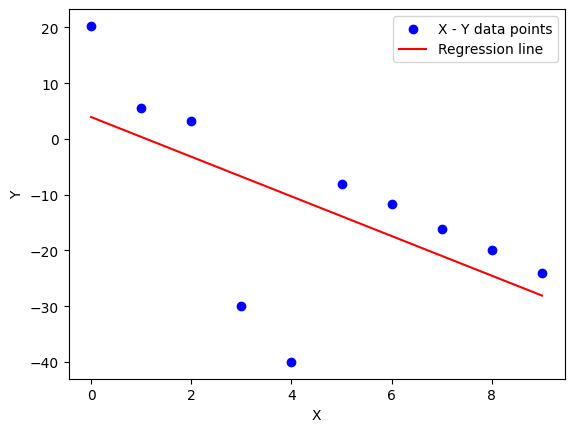

In [ ]:
model = LinearRegression()

model.fit(dataset.X.values.reshape(-1,1),dataset.Y)

plt.scatter(dataset.X,dataset.Y,color="blue",label="X - Y data points")
plt.plot(dataset.X,model.predict(dataset.X.values.reshape(-1,1)),color="red",label="Regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [ ]:
print("Slope:",model.coef_)
print("Intercept:",model.intercept_)

Slope: [-3.55727273]
Intercept: 3.916727272727277


In [ ]:
beta_values = [1,10**-6,10**3]
n = 10

print("Model 1 \n")
for beta in beta_values:
  loss_value = 0
  for i in range(n):
    y_pred = -4*dataset.X[i] + 12
    y_sample = dataset.Y[i]
    loss_value += ((y_sample-y_pred)**2)/((y_sample-y_pred)**2+(beta**2))
  loss_value = loss_value/n
  print("Loss value for beta = ",beta,"is",loss_value)

print("\nModel 2 \n")
for beta in beta_values:
  loss_value = 0
  for i in range(n):
    y_pred = -3.55*dataset.X[i] + 3.91
    y_sample = dataset.Y[i]
    loss_value += ((y_sample-y_pred)**2)/((y_sample-y_pred)**2+(beta**2))
  loss_value = loss_value/n
  print("Loss value for beta = ",beta,"is",loss_value)

Model 1 

Loss value for beta =  1 is 0.435416262490386
Loss value for beta =  1e-06 is 0.9999999998258206
Loss value for beta =  1000 is 0.0002268287498440988

Model 2 

Loss value for beta =  1 is 0.9728470518681676
Loss value for beta =  1e-06 is 0.9999999999999718
Loss value for beta =  1000 is 0.00018824684654645654


<h2>Task 02 - Loss Function</h2>

[0.99003, 0.9801, 0.9025, 0.81, 0.64, 0.49, 0.36, 0.25, 0.16, 0.09, 0.04, 0.01, 0.0] 

[5.29832, 4.60517, 2.99573, 2.30259, 1.60944, 1.20397, 0.91629, 0.69315, 0.51083, 0.35667, 0.22314, 0.10536, -0.0]


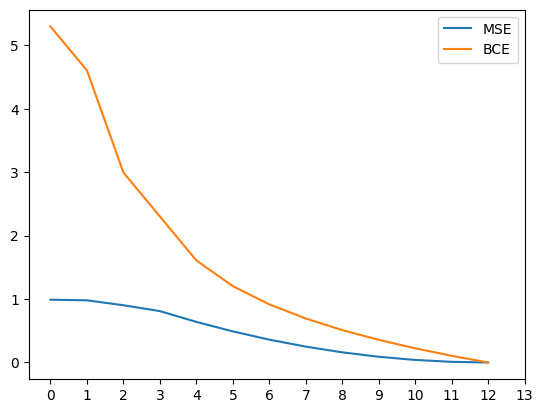

In [ ]:
import math

MSE = 0
BSE = 0
sum_mse = 0
sum_bse = 0

predictions = [0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
MSE_ARRAY = []
BCE_ARRAY = []

for i in range(1,len(predictions)+1):
  MSE=(1-predictions[i-1])**2
  MSE_ARRAY.append(round(MSE, 5))

  BSE=-(math.log(predictions[i-1]))
  BCE_ARRAY.append(round(BSE, 5))

print(MSE_ARRAY,"\n")
print(BCE_ARRAY)

plt.plot(MSE_ARRAY,label="MSE")
plt.plot(BCE_ARRAY,label="BCE")
plt.xticks(range(0,len(predictions)+1))
plt.legend()
plt.show()

<h2>Task 03 - Data Pre-processing</h2>

11


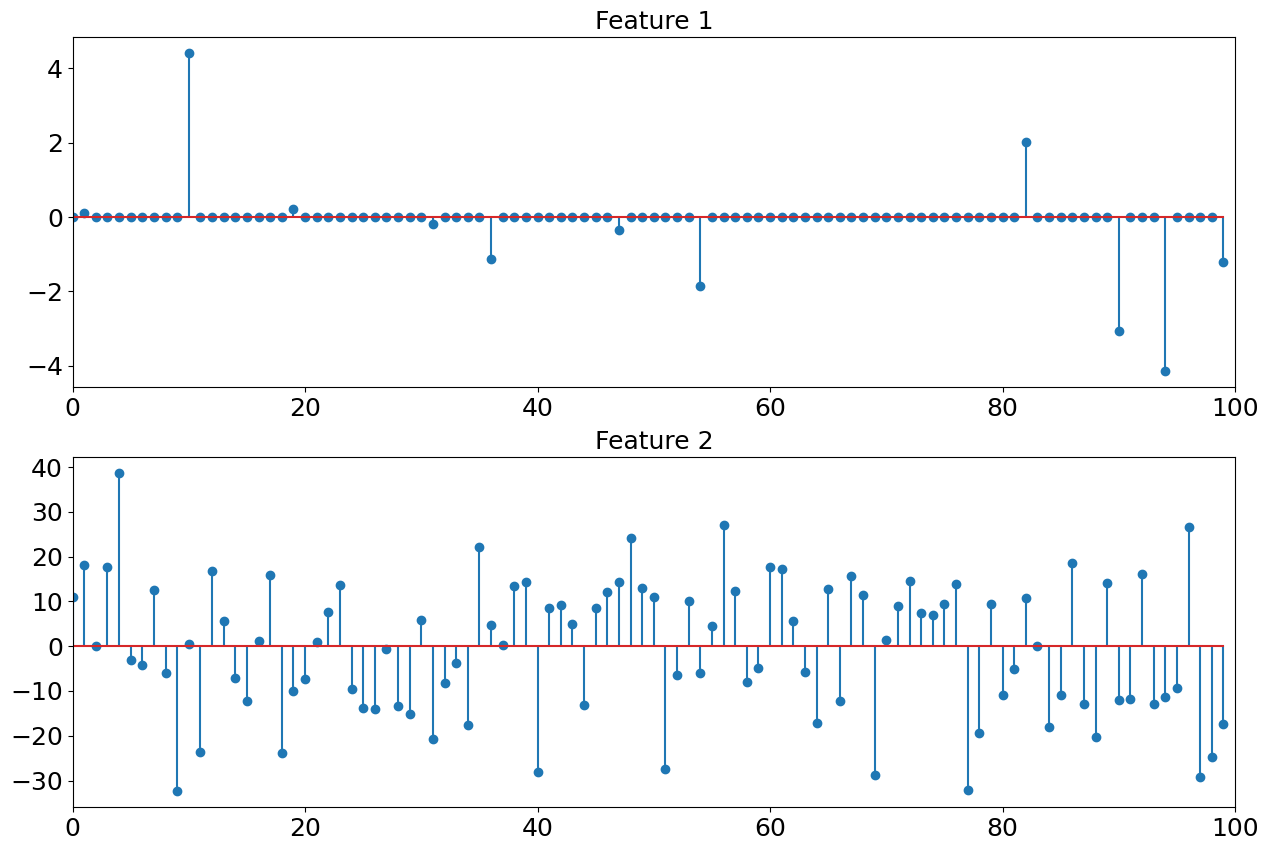

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
  signal = np.zeros(signal_length)
  nonzero_indices = np.random.choice(signal_length, num_nonzero,
  replace=False)
  nonzero_values = 10*np.random.randn(num_nonzero)
  signal[nonzero_indices] = nonzero_values
  return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10

# Number of non-zero elements in the signal
your_index_no= 220506# Enter your index no without english letters and without leading zeros
sparse_signal = generate_signal(signal_length, num_nonzero)

sparse_signal[10] = (your_index_no % 10)*2 + 10
if your_index_no % 10 == 0:
  sparse_signal[10] = np.random.randn(1) + 30

sparse_signal=sparse_signal/5
epsilon = np.random.normal(0, 15, signal_length )#epsilon=epsilon[:, np.newaxis]

plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()

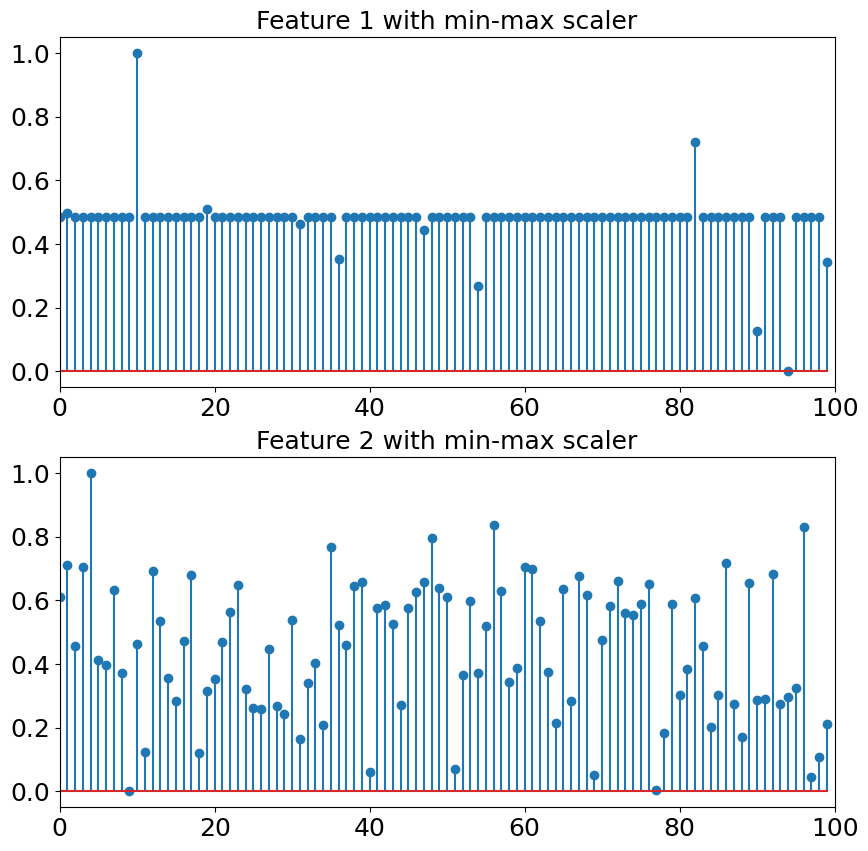

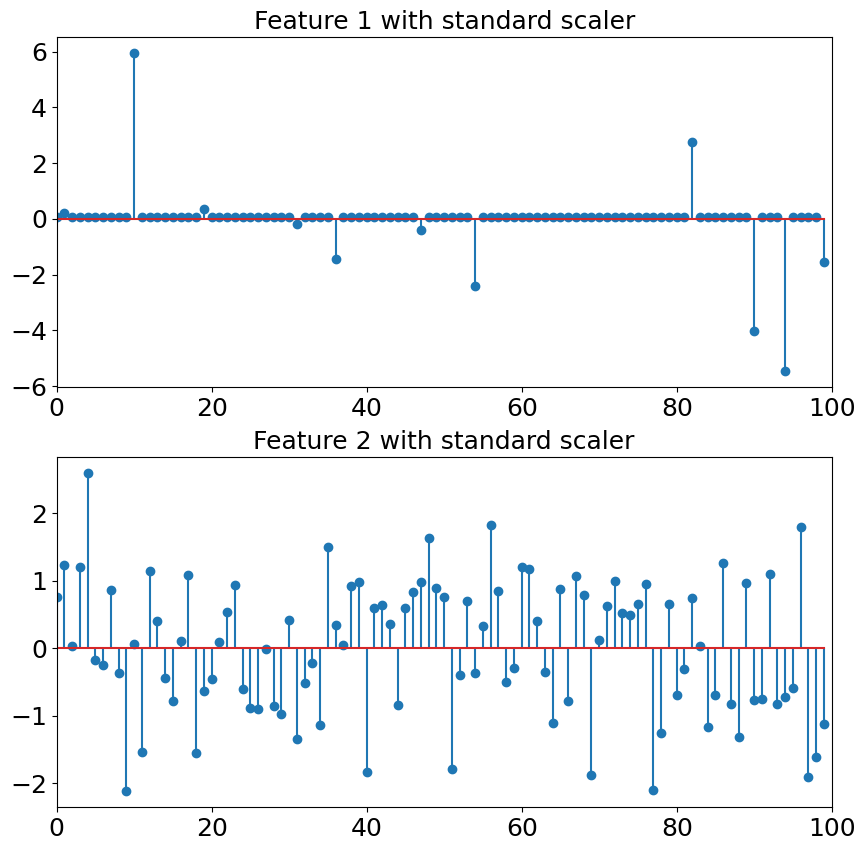

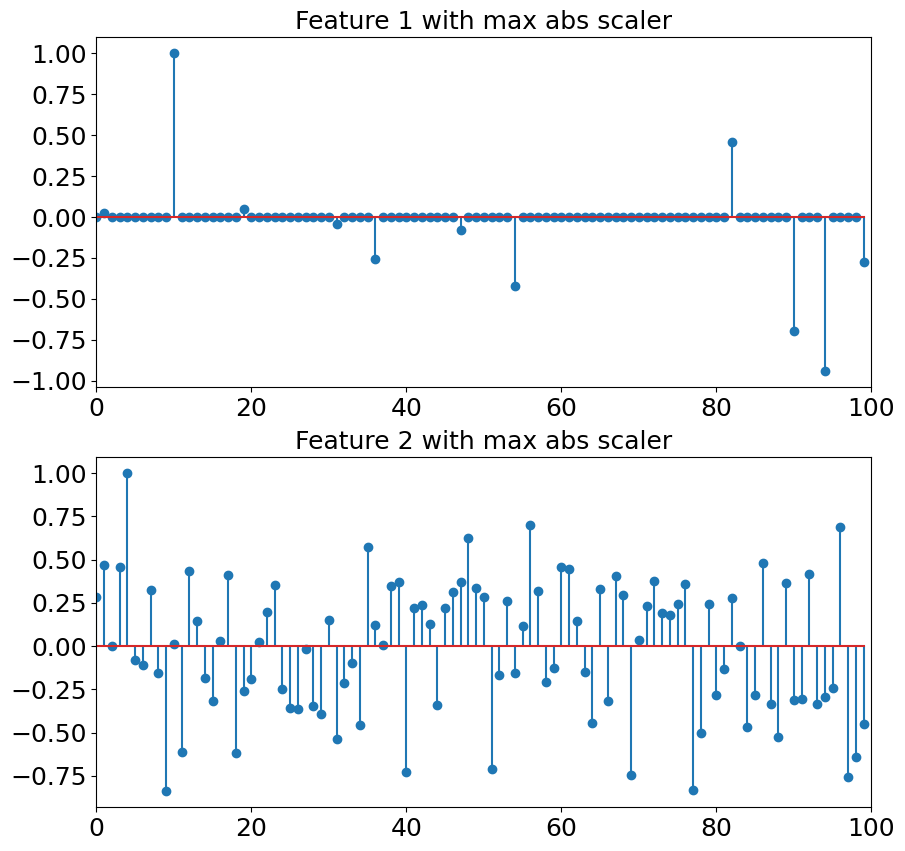

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
max_abs_scaler = MaxAbsScaler()

sparse_signal_min_max_scaled = min_max_scaler.fit_transform(sparse_signal.reshape(-1, 1))
epsilon_min_max_scaled = min_max_scaler.fit_transform(epsilon.reshape(-1, 1))
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 with min-max scaler", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal_min_max_scaled)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 with min-max scaler", fontsize=18)
plt.stem(epsilon_min_max_scaled)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()
print("\n")

sparse_signal_standard_scaled = standard_scaler.fit_transform(sparse_signal.reshape(-1, 1))
epsilon_standard_scaled = standard_scaler.fit_transform(epsilon.reshape(-1, 1))
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 with standard scaler", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal_standard_scaled)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 with standard scaler", fontsize=18)
plt.stem(epsilon_standard_scaled)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()
print("\n")

sparse_signal_max_abs_scaled = max_abs_scaler.fit_transform(sparse_signal.reshape(-1, 1))
epsilon_max_abs_scaled = max_abs_scaler.fit_transform(epsilon.reshape(-1, 1))
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 with max abs scaler", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal_max_abs_scaled)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 with max abs scaler", fontsize=18)
plt.stem(epsilon_max_abs_scaled)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()